In [23]:
import csv
import numpy as np
import pandas as pd
import patsy 

%matplotlib inline

# For running regressions and R-type formulas
import statsmodels
import statsmodels.api as sm
# R type regression formulas
import statsmodels.formula.api as smf

df = pd.read_csv('parsed_data_1b.csv')

print len(df)
df = df.dropna()
df = df[df.herfindahl > 0]
print len(df)
df.columns

69
65


Index([u'firm', u'receiving_firm', u'herfindahl', u'nb_of_patents'], dtype='object')

In [24]:
df.head(3)

,firm,receiving_firm,herfindahl,nb_of_patents
0,AAOI,0,0.166667,28
1,ADI,13,0.111111,607
2,AFOP,2,0.142857,42


In [25]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
receiving_firm,65,6.753846,12.574815,0.000000,0.000000,2.000,7.0,70
herfindahl,65,0.196392,0.152001,0.111111,0.111111,0.125,0.2,1
nb_of_patents,65,536.061538,1541.417194,1.000000,19.000000,49.000,194.0,9763


In [26]:
# Design matrices (endog & exog)
# http://statsmodels.sourceforge.net/devel/gettingstarted.html
y, X = patsy.dmatrices('receiving_firm ~ herfindahl + np.square(herfindahl)', data=df, return_type='dataframe')

#y[:3]
#X[:3]

mod = sm.Poisson(y, X)    # Describe model
res = mod.fit()       # Fit model
print res.summary()   # Summarize model

Optimization terminated successfully.
         Current function value: 5.755722
         Iterations 13
                          Poisson Regression Results                          
Dep. Variable:         receiving_firm   No. Observations:                   65
Model:                        Poisson   Df Residuals:                       62
Method:                           MLE   Df Model:                            2
Date:                Mon, 22 Feb 2016   Pseudo R-squ.:                  0.3303
Time:                        15:37:13   Log-Likelihood:                -374.12
converged:                       True   LL-Null:                       -558.68
                                        LLR p-value:                 7.060e-81
                            coef    std err          z      P>|z|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------------
Intercept                 6.8053      0.440     15.483      0.000         5.944     7

In [ ]:
# Logit Model
y, X = patsy.dmatrices('receiving_firm ~ herfindahl + np.square(herfindahl)', data=df, return_type='dataframe')

logit_mod = sm.Logit(y, X)    # Describe model
logit_res = logit_mod.fit()       # Fit model
print logit_res.summary()   # Summarize model

In [ ]:
#res.params

In [ ]:
#sm.stats.linear_rainbow(res)

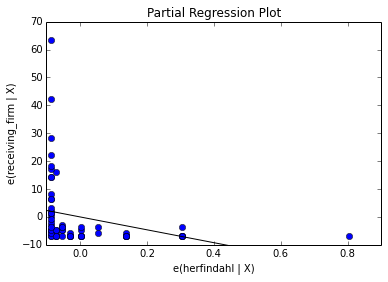

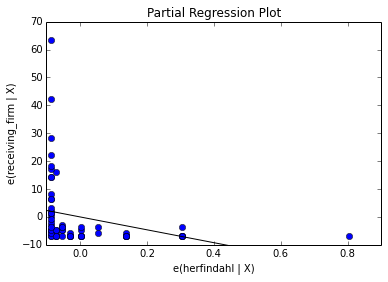

In [27]:
sm.graphics.plot_partregress('receiving_firm', 'herfindahl', [], data=df, obs_labels=False)

In [ ]:
test_df1 = pd.DataFrame({'A': [1, 2, 3], 'B': ['a', 'b', 'c'], 'C': ['@', '$', '&'] })
test_df = pd.DataFrame({'A': [1, 2, 3], 'B': ['a', 'b', 'c'], 'C': [True, True, False] })

In [ ]:
type(test_df['C'][0])